In this lab, we'll experiment a bit more with the task of binary classification. We'll be considering four different classifiers, respectively the Logistic Regression, the Linear Discriminant Analysis (LDA), the Quadratic Discriminant Analysis (QDA), and Naïve Bayes. 

We'll be using the 'wine.csv' dataset, which contains several attributes of white wines, and each observation is associated to a binary quality value, indicating whethter the wine is of superior quality or not. The present goal is to use the above classifiers to determine the quality group of a wine based on its set of attributes. 

The columns of the dataframe contain the following information :
* fixed_acidity : amount of tartaric acid in g/dm^3
* volatile_acidity : amount of acetic acid in g/dm^3 
* citric_acid : amount of citric acid in g/dm^3
* residual_sugar : amount of remaining sugar after fermentation stops in g/l
* chlorides : amount of salt in wine 
* free_sulfur_dioxide : amount of free SO2
* total_sulfur_dioxide : amount of free and bound forms of SO2
* density : density of the wine
* pH : PH level of the wine on a scale from 0 to 14
* sulphates : amount of sulphates 
* alcohol : the percent of alcohol content
* quality : quality of the wine (1 : superior, 0 : inferior)

**Import necessary libraries**

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from scipy.stats import norm 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import math
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices


# Data exploration

**1) Read the dataset 'wine.csv', check its properties. Check and handle possible missing values.** 

In [ ]:
file = 'wine.csv'
df = pd.read_csv(file, index_col=0)
print(df.info())
print(df.head())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB
None
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         

**2) Look at the distribution of the target variable 'quality' (using a barplot).**

**Do you notice anything ?**

[0.7835851367905268, 0.21641486320947326]


Text(0.5, 1.0, 'Distribution of "Quality"')

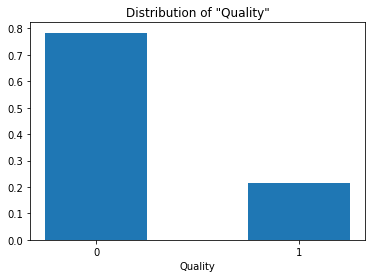

In [ ]:
fig, ax = plt.subplots()

categories = df['quality'].value_counts().index.astype(str)
counts = df['quality'].value_counts().values 
counts = [elem/df.shape[0] for elem in counts]
print(counts)
ax.bar(categories, counts, width=0.5)
ax.set_xlabel("Quality")
ax.set_title('Distribution of "Quality"')

There's a high class imbalance, with around 78% of observations belonging to the class '0'.

**3) Plot a boxplot for each of the predictor variables, while separating for the quality level. Use the 'boxplot' method of the seaborn library.**

**From the obtained boxplots, can you spot the 3 predictors that might seem to be most useful in predicting the target variable 'quality' ?**

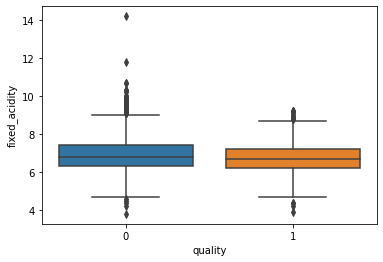

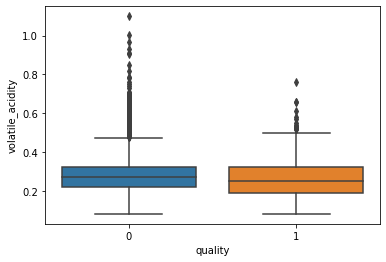

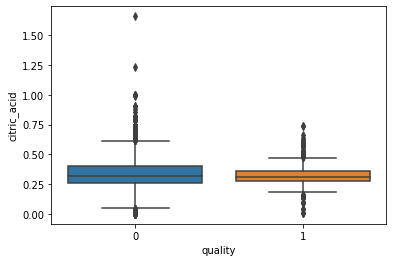

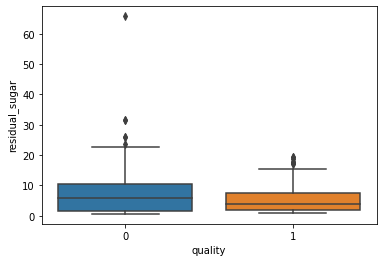

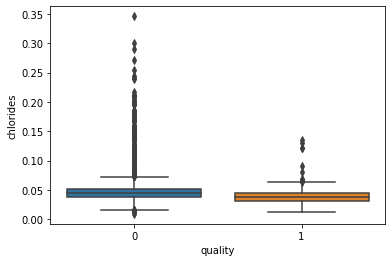

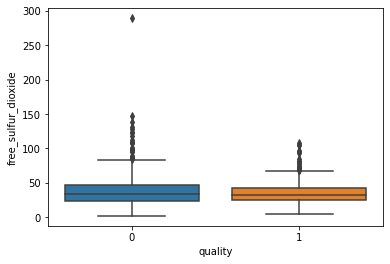

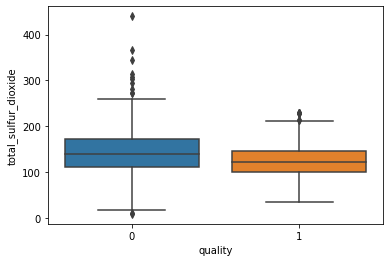

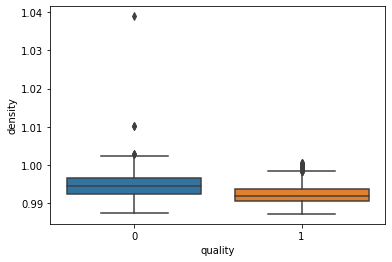

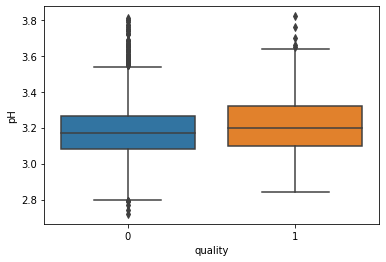

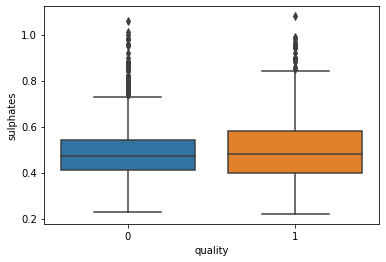

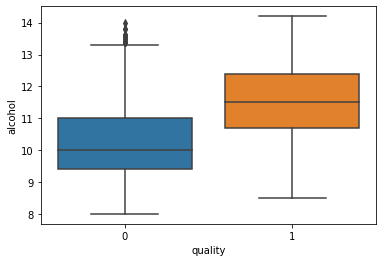

In [ ]:
X = df.drop('quality', axis=1)
for key in X.columns:
  sns.boxplot(x='quality', y=key, data=df)
  plt.show()

From the obtained boxplots, it would appear that 'alcohol', 'density' and 'total_sulfur_dioxide' are the three most powerful predictors. The remaining predictors look relatively weaker.

# Logisitic Regression

**4) Select 'quality' as the target variable and 'density' and 'alcohol' as the predictors. Fit a logistic regression model to the data, and output its summary.**

**How do you interpret the obtained coefficients ? Are they significant ? What does it tell you ?** 

**Use the "Logit" model of the 'statsmodel' library, and create your input matrices using the method 'dmatrices' from the 'patsy' library. Do not split the dataset.**

In [48]:
y, X = dmatrices('quality ~ density + alcohol', data=df, return_type='dataframe')

'''
If you don't want to use the method dmatrices and directly select the columns in the dataframe, you must be careful as statsmodel does not fit an 
intercept by default. In this case, you must add a constant column to the input X (using the method add_constant) that will be used to fit an intercept. 

y = df.quality
X = df[['density', 'alcohol']]
X =sm.tools.tools.add_constant(X)
'''
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4898, dtype: int64
      const  density  alcohol
0       1.0  1.00100      8.8
1       1.0  0.99400      9.5
2       1.0  0.99510     10.1
3       1.0  0.99560      9.9
4       1.0  0.99560      9.9
...     ...      ...      ...
4893    1.0  0.99114     11.2
4894    1.0  0.99490      9.6
4895    1.0  0.99254      9.4
4896    1.0  0.98869     12.8
4897    1.0  0.98941     11.8

[4898 rows x 3 columns]
Optimization terminated successfully.
         Current function value: 0.448364
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4895
Method:                           MLE   Df Model:                            2
Date:                Thu, 31 Mar 2022   Pseud

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The logistic regression model can be made linear by taking the log() of the odds :

$\text{log}\Big(\frac{P(Y=1|X;\beta)}{1- P(Y=1|X;\beta)}\Big) = \beta_0 + \beta_1*\text{density} + \beta_2*\text{alcohol}$

For a fixed value of 'density', a unit increase of 'alcohol' increases the **log_odds** of having a superior quality wine by 0.82, or equivalently, it increases the **odds** by e^(0.82) = 2.27.

The same reasoning applies for the variable 'density'. Here, the intercept does not have an interpretation, as the variable 'density' cannot take on the value 0. 

Looking at its p-value, the coefficient of the variable 'density' is not significant at the 5% significance level, which means that there's not enough evidence in the data to conclude of a significant relationship between the variables 'density' and 'quality'.
On the other hand, the coefficient of the variable 'alcohol' is significant at the 5% significance level, which allows us to reject the null-hypothesis that this coefficient equals 0. Thus, we can conlude that there exits a relationship between the alcohol degree and the quality of the wine.


**5) Refit the same model as above, but introduce an interaction term between the variables 'density' and 'alcohol'.**

**How do you interpret the model ? What happened to the significance of the coefficients ?**

In [ ]:
y, X = dmatrices('quality ~ density*alcohol', data=df, return_type='dataframe')

log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.446403
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4894
Method:                           MLE   Df Model:                            3
Date:                Thu, 31 Mar 2022   Pseudo R-squ.:                  0.1454
Time:                        11:39:53   Log-Likelihood:                -2186.5
converged:                       True   LL-Null:                       -2558.4
Covariance Type:            nonrobust   LLR p-value:                6.651e-161
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -540.7432    118.011     -4.582      0.000    -772.040    -309.447
density       

All the coefficients of the model are now statistically significant at the 5% significance level. 

The model now writes : $\text{log}\Big(\frac{P(Y=1|X;\beta)}{1- P(Y=1|X;\beta)}\Big) = \beta_0 + \text{alcohol}*(\beta_1 + \beta_3*\text{density}) + \beta_2*\text{density}$ 

Thus, by keeping 'density' constant, a unit increase in 'alcohol' increases the log_odds by : $534.43 - 49.1*\text{density}$. The same reasoning applies for the variable 'density'.


# Linear Discriminant Analysis

**6) Select the predictor variable 'density' and fit a LDA model to classify the target variable 'quality'. Do not split the dataset.**

**Compute the decision boundary of the model. Then, on the same plot, display the densities of the variable 'density' for each class of 'quality' scaled by their priors, as well as the decision boundary. What do you observe ?**

**You can draw a normal distribution using the method 'norm.pdf' from the 'scipy' library. Check the attributes of the class 'LDA' to see how you can obtain the priors, the means, and the variance**

0.9883104940894065


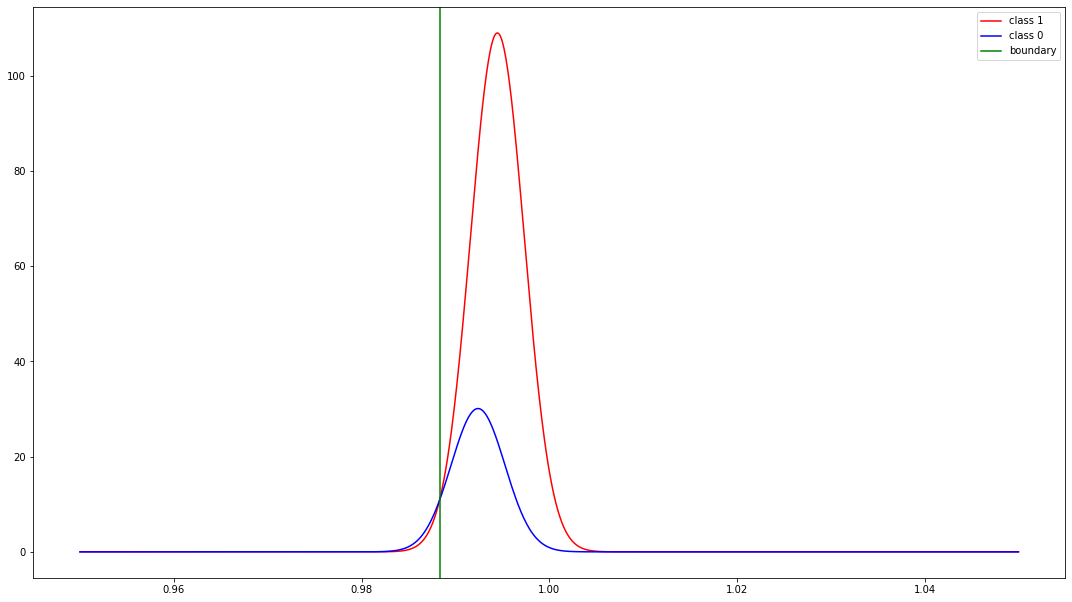

In [ ]:
X = df["density"].values[:,np.newaxis]
#X = df.drop("quality", axis=1)
y = df.quality 

model = LinearDiscriminantAnalysis(store_covariance=True)

model.fit(X,y)

mean1, mean2 = model.means_[0,0], model.means_[1,0]
variance = model.covariance_[0,0]

p1 , p2 = model.priors_[0], model.priors_[1]

scaled_mean1, scaled_mean2 = mean1*p1, mean2*p2
scaled_variance1, scaled_variance2 = variance*(p1**2), variance*(p2**2)

decision_boundary = (mean1 + mean2)/2  + variance/(mean1-mean2)*np.log(p2/p1)
print(decision_boundary)

fig, ax = plt.subplots()
x_axis = np.arange(0.95, 1.05, 0.0001)

ax.plot(x_axis, p1*norm.pdf(x_axis,mean1,math.sqrt(variance)), color='red', label='class 1')
ax.plot(x_axis, p2*norm.pdf(x_axis,mean2,math.sqrt(variance)), color='blue', label='class 0')
ax.axvline(decision_boundary, color='green', label='boundary')
ax.legend()
fig.set_size_inches(18.5, 10.5)
plt.show()


by writting the variable 'density' as x, the boundary decision for a LDA is computed as such :

$\delta_0(x) = \delta_1(x)$

$\leftrightarrow x\frac{\mu_0}{\sigma^2} - \frac{\mu_0^2}{2\sigma^2} + \text{log}(\pi_0) = x\frac{\mu_1}{\sigma^2} - \frac{\mu_1^2}{2\sigma^2} + \text{log}(\pi_1) $

$\leftrightarrow x(\frac{\mu_0 - \mu_1}{\sigma^2}) = \frac{\mu_0^2 - \mu_1^2}{2\sigma^2} + \text{log}(\frac{\pi_1}{\pi_0})$ 

$\leftrightarrow x = \frac{\mu_0 + \mu_1}{2} + \frac{\sigma^2}{\mu_0 - \mu_1}\text{log}(\frac{\pi_1}{\pi_0})$


If we plot $\pi_0f_0(x)$, $\pi_1f_1(x)$, we can observe that the decision boundary falls right at the intersection of the two scaled density functions. This is indeed expected as the LDA classifier will classify an observation to the class '0' or to the class '1' based on :

$p_k(x) = \underset{k \in {0,1}}{\text{argmax}} \frac{\pi_kf_k(x)}{\sum_{l \in {0,1}} \pi_l f_l(x)} = \underset{k \in {0,1}}{\text{argmax}}~\pi_kf_k(x)$, as the denominator is constant $∀k$. 


The boundary decision tells us how the LDA classifier will classify a wine based on its density value. In this case, for any value of density below 0.988, the wine will be classified as inferior (0), and as superior (1) for any value of density above 0.988. 


**7) Select the variables 'sulphate' and 'alcohol' as predictor variables, and fit a LDA model to predict the variable 'quality'. Do not split the dataset.**

**Draw a scatter plot of the predictor variables, while separating for the class 'quality'. Then, on the predictor space, draw the decision boundary.** 

**Check how you can obtain the 'coefficients' and the 'intercept' for the decision boundary [here](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda-math) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).**

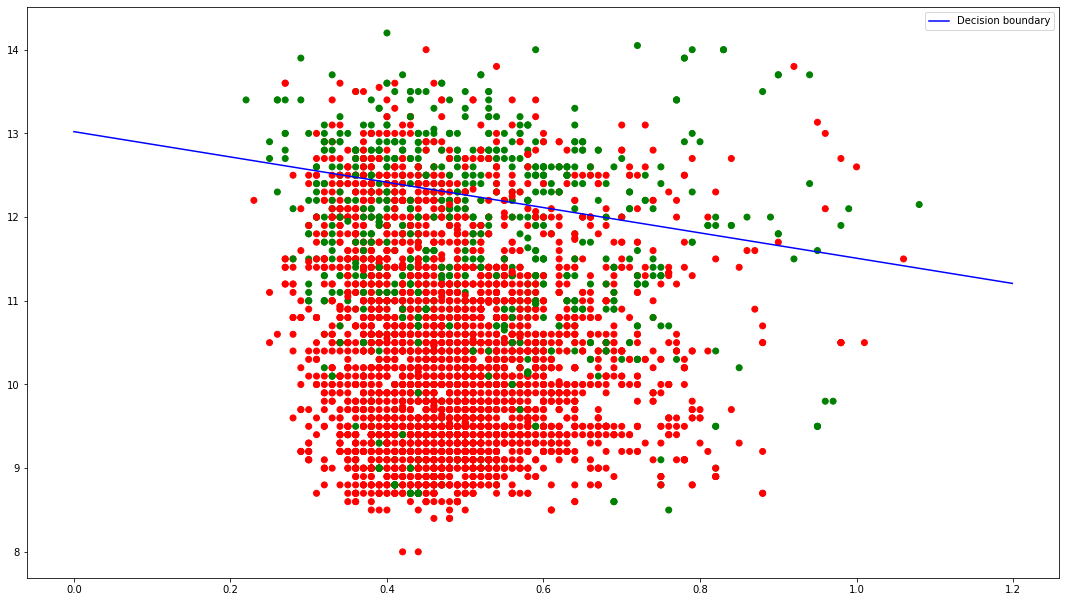

In [ ]:
X = df[['sulphates', 'alcohol']]
y = df.quality

colors = {0:'red', 1:'green'}


fig, ax = plt.subplots()
ax.scatter(X['sulphates'], X['alcohol'], c=y.map(colors))
fig.set_size_inches(18.5, 10.5)

model.fit(X,y)

covariance = model.covariance_
mean1, mean2 = model.means_[0], model.means_[1]

w1, w2 = model.coef_[0][0], model.coef_[0][1]
intercept = model.intercept_[0]

x1 = np.arange(0, 1.2, 0.001)
x2 = (-intercept - w1*x1)/w2

ax.plot(x1, x2, color='blue', label='Decision boundary')
ax.legend()

The LDA classifier being a linear model, its decision boundary is a straight line in two dimensions. In the above scatter plot, we can observe that the observations are not linearly separable, which means that we cannot find a straight line that perfectly splits the two classes. 

Intuitively, you might think that we should be better off if we could find a complex polynomial function that could perfectly separate all of my points (which would result in a training error of 0). However, by doing so, we'll also model the 'noise' in the data, and if we tried to apply this model to a new dataset (unseen by the model during training), it will likely result in a high error. 

# Classifiers comparison and metrics

**8) Using the three most powerful predictors identified in exercice 3, successively fit a logistic regression model, a LDA, a QDA, and a Naïve Bayes model to predict the target variable 'quality' using a 10-folds cross-validation. Evaluate the model on its accuracy.**

**For convergence issue, set the logistic regression solver to 'liblinear', and fit the intercept. The Gaussian Naïve Bayes classifier is called 'GaussianNB' is scikit-learn.**

**Which of the four classifiers performs best in classifying the target variable 'quality' ?**


In [ ]:
X = df[['alcohol', 'density', 'total_sulfur_dioxide']]
y = df.quality

model_lr = LogisticRegression(fit_intercept=True, solver='liblinear')
model_lda = LinearDiscriminantAnalysis()
model_qda = QuadraticDiscriminantAnalysis()
model_bayes = GaussianNB() 

cv_results_lr = cross_validate(model_lr, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_lda = cross_validate(model_lda, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_qda = cross_validate(model_qda, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_bayes = cross_validate(model_bayes, X, y, cv=10, scoring=['accuracy'], return_train_score=True)


train_acc_lr = cv_results_lr['train_accuracy']
test_acc_lr = cv_results_lr['test_accuracy']
mean_train_acc_lr = train_acc_lr.mean()
mean_test_acc_lr = test_acc_lr.mean()

train_acc_lda = cv_results_lda['train_accuracy']
test_acc_lda = cv_results_lda['test_accuracy']
mean_train_acc_lda = train_acc_lda.mean()
mean_test_acc_lda = test_acc_lda.mean()

train_acc_qda = cv_results_qda['train_accuracy']
test_acc_qda = cv_results_qda['test_accuracy']
mean_train_acc_qda = train_acc_qda.mean()
mean_test_acc_qda = test_acc_qda.mean()

train_acc_bayes = cv_results_bayes['train_accuracy']
test_acc_bayes = cv_results_bayes['test_accuracy']
mean_train_acc_bayes = train_acc_bayes.mean()
mean_test_acc_bayes = test_acc_bayes.mean()

print('Train accuracy for Logistic Regression: {}'.format(mean_train_acc_lr))
print('Test accuracy for Logistic Regression: {}'.format(mean_test_acc_lr))

print('Train accuracy for LDA: {}'.format(mean_train_acc_lda))
print('Test accuracy for LDA: {}'.format(mean_test_acc_lda))

print('Train accuracy for QDA: {}'.format(mean_train_acc_qda))
print('Test accuracy for QDA: {}'.format(mean_test_acc_qda))

print('Train accuracy for Naive Bayes: {}'.format(mean_train_acc_bayes))
print('Test accuracy for Naive Bayes: {}'.format(mean_test_acc_bayes))

Train accuracy for Logistic Regression: 0.7989655501718766
Test accuracy for Logistic Regression: 0.7960368932849213
Train accuracy for LDA: 0.7952905169635283
Test accuracy for LDA: 0.7913288260089312
Train accuracy for QDA: 0.7973321820694267
Test accuracy for QDA: 0.7923504862067527
Train accuracy for Naive Bayes: 0.7795471562663238
Test accuracy for Naive Bayes: 0.7782546638287215


The classifiers results are very close to one another, but the logistic regression model seems to be generalizing best. 

**9) Perform the same experiment as the previous point, but now include all predictor variables. Do you notice a significant gain in performance ?**

In [ ]:
X = df.drop('quality', axis=1)
y = df.quality

model_lr = LogisticRegression(fit_intercept=True, solver='liblinear')
model_lda = LinearDiscriminantAnalysis()
model_qda = QuadraticDiscriminantAnalysis()
model_bayes = GaussianNB() 

cv_results_lr = cross_validate(model_lr, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_lda = cross_validate(model_lda, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_qda = cross_validate(model_qda, X, y, cv=10, scoring=['accuracy'], return_train_score=True)
cv_results_bayes = cross_validate(model_bayes, X, y, cv=10, scoring=['accuracy'], return_train_score=True)


train_acc_lr = cv_results_lr['train_accuracy']
test_acc_lr = cv_results_lr['test_accuracy']
mean_train_acc_lr = train_acc_lr.mean()
mean_test_acc_lr = test_acc_lr.mean()

train_acc_lda = cv_results_lda['train_accuracy']
test_acc_lda = cv_results_lda['test_accuracy']
mean_train_acc_lda = train_acc_lda.mean()
mean_test_acc_lda = test_acc_lda.mean()

train_acc_qda = cv_results_qda['train_accuracy']
test_acc_qda = cv_results_qda['test_accuracy']
mean_train_acc_qda = train_acc_qda.mean()
mean_test_acc_qda = test_acc_qda.mean()

train_acc_bayes = cv_results_bayes['train_accuracy']
test_acc_bayes = cv_results_bayes['test_accuracy']
mean_train_acc_bayes = train_acc_bayes.mean()
mean_test_acc_bayes = test_acc_bayes.mean()

print('Train accuracy for Logistic Regression: {}'.format(mean_train_acc_lr))
print('Test accuracy for Logistic Regression: {}'.format(mean_test_acc_lr))

print('Train accuracy for LDA: {}'.format(mean_train_acc_lda))
print('Test accuracy for LDA: {}'.format(mean_test_acc_lda))

print('Train accuracy for QDA: {}'.format(mean_train_acc_qda))
print('Test accuracy for QDA: {}'.format(mean_test_acc_qda))

print('Train accuracy for Naive Bayes: {}'.format(mean_train_acc_bayes))
print('Test accuracy for Naive Bayes: {}'.format(mean_test_acc_bayes))

Train accuracy for Logistic Regression: 0.8017557100453248
Test accuracy for Logistic Regression: 0.7962351320896457
Train accuracy for LDA: 0.8024362496444535
Test accuracy for LDA: 0.7964346229289261
Train accuracy for QDA: 0.7547070029583935
Test accuracy for QDA: 0.7394628771754099
Train accuracy for Naive Bayes: 0.727984074194057
Test accuracy for Naive Bayes: 0.7261821292934352


The performance of the logisitic regression model and of the LDA only marginally increased, while it even decreased for the QDA and Naïve Bayes models. This may indicate that the remaining predictors do not have a strong discriminative power in predicting the outcome variable. 

**10) Select the best model found above and the 3 most relevant predictors, split your data in train and test datasets according to a 0.8/0.2 partition, and fit it to the training data.** 

**Evaluate the model on the accuracy, and display the confusion matrix. You'll need to use the 'confusion_matrix' and the 'ConfusionMatrixDisplay' methods from the scikit-learn library. Can you think of any problem that might arise when evaluating the model on the accuracy ? Think of the distribution of the target variable.**

**11) Compute the True Positive Rate, the True Negative Rate, the False Positive Rate, the False Negative Rate, and the Precision. How do you interpret these metrics ? The TP, FP, TN and FN can be directly obtained from the confusion matrix.**

**Draw the Receiver Operating Curve, and compute the area under the curve. You'll need the methods 'roc_curve' and 'roc_auc_score'. Does the model look to have any predictive power ?**

TPR : 0.2376237623762376
FPR : 0.02699228791773779
TNR : 0.9730077120822622
FNR : 0.7623762376237624
Precision : 0.6956521739130435


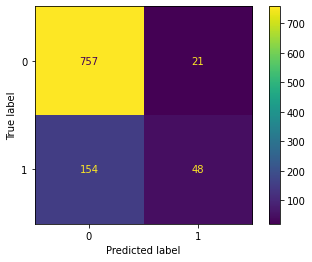

In [ ]:
X = df[['alcohol', 'density', 'total_sulfur_dioxide']]
y = df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

tn, fp, fn, tp = cm.ravel()

tp_rate = tp/(tp + fn)
fp_rate = fp/(tn + fp )
tn_rate = tn/(tn + fp)
fn_rate = fn/(tp + fn)
precision = tp/(tp+fp)


print('TPR : {}'.format(tp_rate))
print('FPR : {}'.format(fp_rate))
print('TNR : {}'.format(tn_rate))
print('FNR : {}'.format(fn_rate))
print('Precision : {}'.format(precision))

We have an imbalanced dataset, with onlt 22% of observations belonging to the positive class. Let's say our classifier only classify observations to the negative class. In this case, the accuracy is : $\text{Acc} = \frac{TP + TN}{N + P} = 0 + 0.78 = 0.78$. This means that, even if the model can only predict the '0' class, we'll get an accuracy of 78%, which can be highly misleading regarding the performance of the model. The confusion matrix can give more insight regarding what's really happening behind the scenes. 

$TPR = \frac{TP}{TP + FN} = 0.19$
* Amongst all the observations belonging the positive class, only 19% were correctly classified as positive. 

$FPR = \frac{FP}{TN + FP} = 0.02$ 
* Amongst all the observations belonging to the negative class, only 2% were wrongly classified as positive.

$TNR = \frac{TN}{TN + FP} = 0.98$
* Amongst all the observations belonging to the negative class, 98% were correctly classified as negative. 

$FNR = \frac{FN}{FN + TP} = 0.81$
* Amongst all the observations belonging to the positive class, 81% were wrongly classified as negative.

$\text{Precision} = \frac{TP}{TP + FP} = 0.68$
* Amongst all the observations that were classified by the model as positive, 
68% are actually positive. 


The FNR is very high, meaning that our model has the tendency to classify positive instances as negatives. This behaviour can be explained by the high class imbalance present in the dataset. 

Text(0.5, 1.0, 'Receiver Operating Curvee')

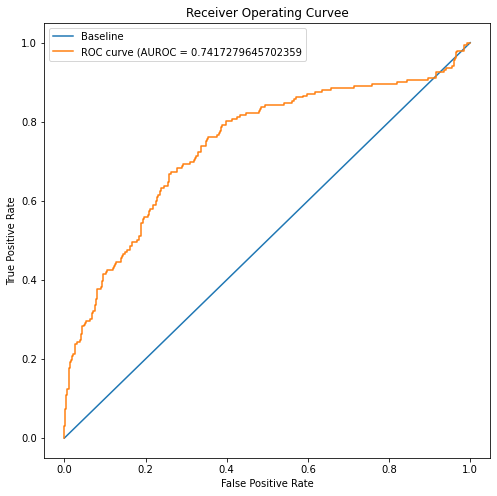

In [ ]:
y_score = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

xaxis = np.arange(0,1.1,0.1)

ax.plot(xaxis, xaxis, label='Baseline')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

roc_auc = roc_auc_score(y_test, y_score) 

ax.plot(fpr, tpr, label='ROC curve (AUROC = {}'.format(roc_auc))
ax.legend()
ax.set_title('Receiver Operating Curvee')

A random model (i.e. a model that classifies observations randomly, meaning it has no predictive power) will have a AUC of 0.5, represented here by the blue line. As the AUC reaches 0.77, and as the ROC is clearly above the baseline, we can conclude that the model has indeed predictive power. 

Adjusting for the threshold depends on the application at hand, and on the objective that we want to maximize. If capturing positive instances is more important than wrongly classifying negatives as positives, we'll increase the threshold. On the other hand, if we want to keep the FPR at a bare minimum, we'll decrease the threshold. Its a question of compromise.

As a side note, the AUROC can get below 0.5, meaning that the model performs even worse than a random classifier. 